In [1]:
import fastbook

In [2]:
fastbook.setup_book()

In [3]:
from fastbook import *

In [4]:
from IPython.display import display,HTML

In [16]:
from fastai2.text.all import *

In [17]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [18]:
path = untar_data(URLs.IMDB)

In [19]:
dls = DataBlock(
    blocks=(TextBlock.from_folder(path),CategoryBlock),
    get_y = parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')
).dataloaders(path)

In [20]:
files = get_text_files(path, folders = ['train', 'test'])
txts = L(o.open().read() for o in files[:2000])
txts[0]

'One of the more \'literate\' Lone Stars, with time spent on character development and interaction, dialog and acting business. The opening scene sets the stage (literally) for the personalities of the gambler, Kansas Charlie (Eddy Chandler), and his buddy, John Scott (John Wayne) the rodeo (say Roh-Day-oh) star, both of whom are slightly randy. The film follows their adventures, as they try to best each other in the pursuit of the Mexican Juanita, and later in their pursuit of perky Mary Kornman, who has the inevitable evil brother (though he\'d been led astray by the real villain, and wants to repent). And oh, of course, they\'re being wrongly accused of two crimes and have to serve jail time before escaping and being exonerated at the end.<br /><br />The high point is Scott continually and deliberately ogling Mary\'s butt in her grocery store, and knocking away the ladder she\'s standing on so he can catch her and grab her as she falls. It all seems a little contemporary for a 30s w

In [21]:
tok = Tokenizer.from_folder(path)
tok.setup(txts)
toks = txts.map(tok)
toks

(#2000) [(#497) ['xxbos','xxmaj','one','of','the','more',"'",'literate',"'",'xxmaj'...],(#256) ['xxbos','xxmaj','this','is','an','extremely','silly','and','little','seen'...],(#102) ['xxbos','xxmaj','just','like','everybody','else','have','said',',','the'...],(#240) ['xxbos','xxmaj','the','third','installment','of','the','"','carnosaur','"'...],(#280) ['xxbos','xxmaj','wenders','was','great','with','xxmaj','million','$','hotel.i'...],(#401) ['xxbos','xxmaj','songwriter','xxmaj','robert','xxmaj','taylor','(','as','xxmaj'...],(#402) ['xxbos','he','was','my','hero','for','all','time','until','he'...],(#191) ['xxbos','xxmaj','the','first','scene','in',"'",'problem','xxmaj','child'...],(#203) ['xxbos','xxmaj','city','girl','xxmaj','meg','xxmaj','tilly','receives','a'...],(#214) ['xxbos','i','only','rented','this','movie','because','of','promises','of'...]...]

In [22]:
num = Numericalize()
num.setup(toks)
nums = toks.map(num)
#nums[0]
nums[0][:20]

tensor([   2,    8,   43,   15,    9,   76,   66,    0,   66,    8, 2697,    8,  425,   11,   29,   79,  892,   35,  137,  822])

In [23]:
nums_dec= num.decode(nums[0])
nums_dec

(#497) ['xxbos','xxmaj','one','of','the','more',"'",'xxunk',"'",'xxmaj'...]

In [24]:
tok.decode(nums_dec)

'xxbos xxmaj one of the more \' xxunk \' xxmaj lone xxmaj stars , with time spent on character development and interaction , dialog and acting business . xxmaj the opening scene sets the stage ( literally ) for the personalities of the gambler , xxmaj xxunk xxmaj charlie ( eddy xxmaj chandler ) , and his buddy , xxmaj john xxmaj scott ( john xxmaj wayne ) the rodeo ( say xxunk - day - oh ) star , both of whom are slightly randy . xxmaj the film follows their adventures , as they try to best each other in the pursuit of the xxmaj mexican xxmaj xxunk , and later in their pursuit of xxunk xxmaj mary xxmaj xxunk , who has the inevitable evil brother ( though he \'d been led astray by the real villain , and wants to xxunk ) . xxmaj and oh , of course , they \'re being wrongly accused of two crimes and have to serve jail time before escaping and being xxunk at the end . \n\n xxmaj the high point is xxmaj scott continually and deliberately ogling xxmaj mary \'s butt in her grocery store , and

In [25]:
tok((txts[0], txts[1]))

((#497) ['xxbos','xxmaj','one','of','the','more',"'",'literate',"'",'xxmaj'...],
 (#256) ['xxbos','xxmaj','this','is','an','extremely','silly','and','little','seen'...])

In [26]:
@Transform
def f(x:int): return x+1
f(2),f(2.0)

(3, 2.0)

In [27]:
class NormalizeMean(Transform):
    def setups(self, item): self.mean = sum(item)/len(item)
    def encodes(self,x): return x-self.mean
    def decodes(self,x): return x+self.mean  

In [28]:
tfm = NormalizeMean()
tfm.setup([1,2,3,4,5])
start=2
y=tfm(start)
z=tfm.decode(y)
tfm.mean,y,z

(3.0, -1.0, 2.0)

In [29]:
tfms = Pipeline([tok,num])
t = tfms(txts[0])
t[0:20]

tensor([   2,    8,   43,   15,    9,   76,   66,    0,   66,    8, 2697,    8,  425,   11,   29,   79,  892,   35,  137,  822])

In [30]:
tfms.decode(t)[:10]

'xxbos xxma'

In [31]:
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize])

In [32]:
t=tls[0]; t[:20]

tensor([    2,     8,    44,    14,     9,    70,    63, 11432,    63,     8,  3997,     8,   428,    11,    28,    77,  1038,    35,   124,   981])

In [33]:
tls.decode(t)

'xxbos xxmaj one of the more \' literate \' xxmaj lone xxmaj stars , with time spent on character development and interaction , dialog and acting business . xxmaj the opening scene sets the stage ( literally ) for the personalities of the gambler , xxmaj kansas xxmaj charlie ( eddy xxmaj chandler ) , and his buddy , xxmaj john xxmaj scott ( john xxmaj wayne ) the rodeo ( say xxunk - day - oh ) star , both of whom are slightly randy . xxmaj the film follows their adventures , as they try to best each other in the pursuit of the xxmaj mexican xxmaj juanita , and later in their pursuit of perky xxmaj mary xxmaj kornman , who has the inevitable evil brother ( though he \'d been led astray by the real villain , and wants to repent ) . xxmaj and oh , of course , they \'re being wrongly accused of two crimes and have to serve jail time before escaping and being exonerated at the end . \n\n xxmaj the high point is xxmaj scott continually and deliberately ogling xxmaj mary \'s butt in her groce

In [34]:
tls.show(t)

xxbos xxmaj one of the more ' literate ' xxmaj lone xxmaj stars , with time spent on character development and interaction , dialog and acting business . xxmaj the opening scene sets the stage ( literally ) for the personalities of the gambler , xxmaj kansas xxmaj charlie ( eddy xxmaj chandler ) , and his buddy , xxmaj john xxmaj scott ( john xxmaj wayne ) the rodeo ( say xxunk - day - oh ) star , both of whom are slightly randy . xxmaj the film follows their adventures , as they try to best each other in the pursuit of the xxmaj mexican xxmaj juanita , and later in their pursuit of perky xxmaj mary xxmaj kornman , who has the inevitable evil brother ( though he 'd been led astray by the real villain , and wants to repent ) . xxmaj and oh , of course , they 're being wrongly accused of two crimes and have to serve jail time before escaping and being exonerated at the end . 

 xxmaj the high point is xxmaj scott continually and deliberately ogling xxmaj mary 's butt in her grocery store

In [35]:
cut=int(len(files)*0.8)
splits = range(cut), range(cut,len(files))
splits

(range(0, 40000), range(40000, 50000))

In [36]:
tls =TfmdLists(files, [Tokenizer.from_folder(path),Numericalize],splits=splits)

In [37]:
tls.valid[0][:20]

tensor([    2,    19,   258,   678,    30, 11925,    12,   105,    49,  5524, 10289,  1818,    50,  2280,    21, 10289,    16,     9,   855,   474])

In [38]:
#parent_label
lbls=files.map(parent_label)
lbls

(#50000) ['neg','neg','neg','neg','neg','neg','neg','neg','neg','neg'...]

In [39]:
#??Categorize
cat = Categorize()
cat.setup(lbls)
cat.vocab, cat(lbls[0])     # TensorCategory(0)=train set, TensorCategory(0)=valid set

((#2) ['neg','pos'], TensorCategory(0))

In [40]:
tls_y = TfmdLists(files, [parent_label, Categorize()])
tls_y[0]

TensorCategory(0)

In [41]:
x_tfms = [Tokenizer.from_folder(path),Numericalize]
y_tfms = [parent_label, Categorize()]
dsets = Datasets(files, [x_tfms, y_tfms], splits=splits)     #dsets is a tuple
x,y=dsets[0]
x[:20],y

(tensor([    2,     8,    44,    14,     9,    70,    63, 11432,    63,     8,  3997,     8,   428,    11,    28,    77,  1038,    35,   124,   981]),
 TensorCategory(0))

In [42]:
t=dsets.valid[0]
t, dsets.decode(t)

((TensorText([    2,    19,   258,   678,    30, 11925,    12,   105,    49,  5524, 10289,  1818,    50,  2280,    21, 10289,    16,     9,   855,   474,   145,   277,    10,     8,  1460,     8,   601,
             16,    13,  1503,    14,     8,  3010,     8,  3317,    12,  3891, 10289,    10,     8,    20,    30,    16,   390,    14,   103,   138,    11,    91,  1409,   122,    12,    18,   212,
            686,    21,   106,    42,    33, 28775,    12, 18320,    18,   148,  2011,    11,    31,    28,    70,  3077, 10193,    94,  8771,  8253,  2368,    12,   242,   193,   346,  2025,   264,
             27,   546,    27,    13,  1818,  2521,     9,  1516,   115,   754,    15,   242,   328,    53,  2368,    10,     8,    64,    33,   205,    15,   732,   148,   381,    15,    86,    13,
             30,    21,   106,  1723,   124,    51,   746,    12,    97,  5928,    13,  2048,   146,    15,    86,   195,    19,    80,   738,   221,    17,   733,    62,    14,   186,    11,    64,
 

In [43]:
dls=dsets.dataloaders(bs=64,before_batch=pad_input)

In [44]:
tfms = [[Tokenizer.from_folder(path), Numericalize],[parent_label,Categorize]]
files = get_text_files(path,folders=['train','test'])
splits = GrandparentSplitter(valid_name='test')(files)
dsets= Datasets(files, tfms,splits=splits)
dls = dsets.dataloaders(dl_type=SortedDL, before_batch=pad_input)

In [73]:
len(splits[0])

25000

In [5]:
from fastai2.vision.all import *
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")
len(files)

7390

In [6]:
class SiameseImage(fastuple):
    def show(self, ctx=None, **kwargs): 
        img1,img2,same_breed = self
        if not isinstance(img1, Tensor):
            if img2.size != img1.size: img2 = img2.resize(img1.size)
            t1,t2 = tensor(img1),tensor(img2)
            t1,t2 = t1.permute(2,0,1),t2.permute(2,0,1)
        else: t1,t2 = img1,img2
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        return show_image(torch.cat([t1,line,t2], dim=2), 
                          title=same_breed, ctx=ctx)

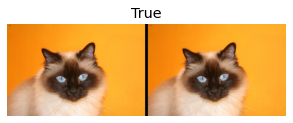

In [7]:
img = PILImage.create(files[0])
s = SiameseImage(img, img, True)
s.show();

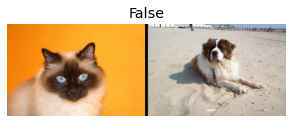

In [8]:
img1 = PILImage.create(files[1])
s1 = SiameseImage(img, img1, False)
s1.show();

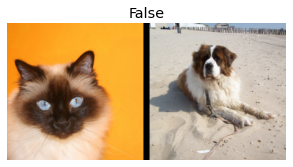

In [9]:
s2 = Resize(224)(s1)
s2.show();

In [10]:
def label_func(fname):
    return re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0]

In [11]:
#re.match(r'^(.*)_\d+.jpg$', files[1].name).groups()
#label_func(files[0])
len(files)

7390

In [12]:
class SiameseTransform(Transform):
    def __init__(self, files, label_func, splits):
        self.labels = files.map(label_func).unique()
        self.lbl2files = {l: L(f for f in files if label_func(f) == l) 
                          for l in self.labels}
        self.label_func = label_func
        self.valid = {f: self._draw(f) for f in files[splits[1]]}
        
    def encodes(self, f):
        f2,t = self.valid.get(f, self._draw(f))
        img1,img2 = PILImage.create(f),PILImage.create(f2)
        return SiameseImage(img1, img2, t)
    
    def _draw(self, f):
        same = random.random() < 0.5
        cls = self.label_func(f)
        if not same: 
            cls = random.choice(L(l for l in self.labels if l != cls)) 
        return random.choice(self.lbl2files[cls]),same

In [13]:
# This code is to test what each line in class SiameseTransform does
splits = RandomSplitter()(files)
labels=files.map(label_func).unique()
lbl2files = {l: L(f for f in files if label_func(f) == l) for l in labels}

def _draw(f):
    same = random.random() < 0.5
    cls=label_func(f)
    if not same:
        cls = random.choice(L(l for l in labels if l != cls)) 
    return random.choice(lbl2files[cls]),same
                
valid = {f: _draw(f) for f in files[splits[1]]}
#valid
f2,t = valid.get(f, _draw(f))
f,f2,t
img1,img2 = PILImage.create(f),PILImage.create(f2)
transformed=SiameseImage(img1, img2, t)
transformed.show();

NameError: name 'f' is not defined

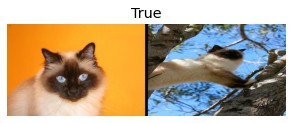

In [14]:
splits = RandomSplitter()(files)
tfm = SiameseTransform(files, label_func, splits)
tfm(files[0]).show();


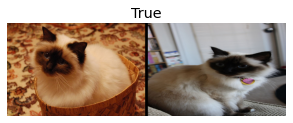

In [15]:
tls = TfmdLists(files, tfm, splits=splits)
#show_at??
show_at(tls.valid,1111);
#TfmdLists??

In [16]:
dls = tls.dataloaders(after_item=[Resize(224), ToTensor], 
    after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])

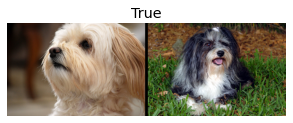

In [18]:
dls.show(tls.valid[1]);

In [21]:
b=dls.one_batch()
type(b)

__main__.SiameseImage